In [48]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
cd /content/drive/MyDrive/Data Analyst/Điểm thi đại học 2022/data

/content/drive/MyDrive/Data Analyst/Điểm thi đại học 2022/data


In [51]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Read file data
df = pd.read_csv('./final_data.csv')
df.head()

,SBD,Toán,Văn,Ngoại Ngữ,Lý,Hoá,Sinh,Lịch Sử,Địa Lý,GDCD,Year,code,province
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,2022,1,Hà Nội
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,2022,1,Hà Nội
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,2022,1,Hà Nội
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,2022,1,Hà Nội
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,2022,1,Hà Nội


In [53]:
df.columns = ['SBD', 'Toan', 'Van', 'Ngoai_ngu', 'Ly', 'Hoa',
              'Sinh', 'Lich_su', 'Dia_ly', 'GDCD', 'Year', 'code', 'province']

In [54]:
# Drop many duplicated rows
df.drop_duplicates(inplace=True)

# Compare histogram between 2020 and 2021 and 2022

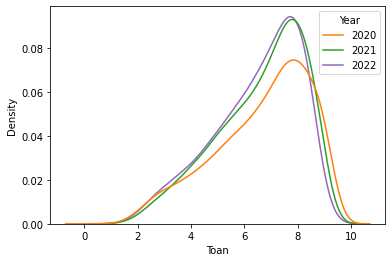

In [55]:
# Compare math between 3 years
sns.kdeplot(data=df, x='Toan', hue='Year', bw_adjust=2, palette=["C1", "C2", "C4"])

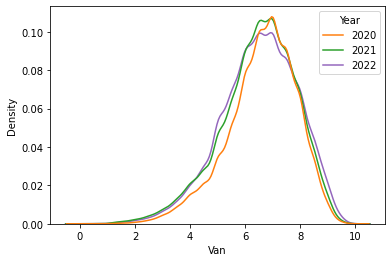

In [56]:
# Compare literature between 3 years
sns.kdeplot(data=df, x='Van', hue='Year', bw_adjust=2, palette=["C1", "C2", "C4"])

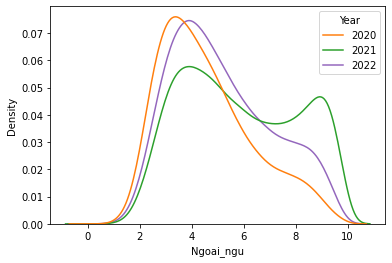

In [57]:
# Compare English between 3 years
sns.kdeplot(data=df, x='Ngoai_ngu', hue='Year', bw_adjust=2, palette=["C1", "C2", "C4"])

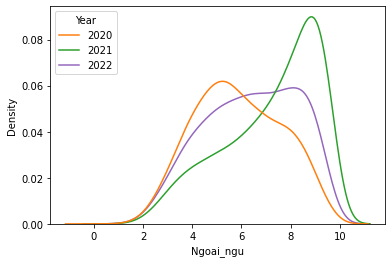

In [58]:
# Compare English between 3 years
sns.kdeplot(data=df[df['code'] == 2], x='Ngoai_ngu', hue='Year', bw_adjust=2, palette=["C1", "C2", "C4"])

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text major ticklabel objects>)

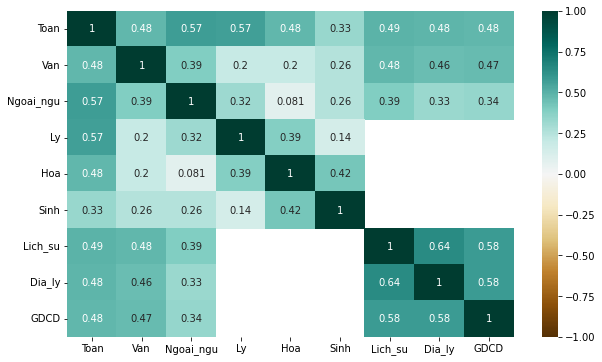

In [59]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[df['Year'] == 2022][['Toan', 'Van', 'Ngoai_ngu', 'Ly', 'Hoa',
       'Sinh', 'Lich_su', 'Dia_ly', 'GDCD']].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.yticks(rotation=0)

# Map

In [60]:
# Only care year 2022
df_2022 = df[df['Year'] == 2022]

In [61]:
import geopandas as gpd
map_df = gpd.read_file('./diaphantinh.geojson')
map_df.head()

,gid,code,ten_tinh,geometry
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ..."
1,2,AD01,Bà Rịa -Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8..."
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ..."
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ..."
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9..."


In [62]:
# Fix some typo errors
map_df.loc[44, 'ten_tinh'] = 'Quảng Bình'
map_df.loc[31, 'ten_tinh'] = 'Kiên Giang'
map_df.loc[12, 'ten_tinh'] = 'Cần Thơ'

In [63]:
# Function to merge map_df
def merge_df(subject_name, map_df, df_2022):
    map_df = map_df.merge(df_2022.groupby('province')[subject_name].mean(), how='left', left_on='ten_tinh', right_on='province')
    map_df.rename(columns={subject_name: subject_name + '_avg'}, inplace=True)
    map_df = map_df.merge(df_2022.groupby('province')[subject_name].std(), how='left', left_on='ten_tinh', right_on='province')
    map_df.rename(columns={subject_name: subject_name + '_std'}, inplace=True)
    map_df = map_df.merge(df_2022.groupby('province')[subject_name].apply(lambda x: (x >= 9).sum()/len(x)), how='left', left_on='ten_tinh', right_on='province')
    map_df.rename(columns={subject_name: subject_name + '_>=9'}, inplace=True)
    return map_df

In [64]:
# Create statistics
for subject_name in ['Toan', 'Van', 'Ngoai_ngu', 'Lich_su', 'GDCD']:
    map_df = merge_df(subject_name, map_df, df_2022)

map_df.head()

,gid,code,ten_tinh,geometry,Toan_avg,Toan_std,Toan_>=9,Van_avg,Van_std,Van_>=9,Ngoai_ngu_avg,Ngoai_ngu_std,Ngoai_ngu_>=9,Lich_su_avg,Lich_su_std,Lich_su_>=9,GDCD_avg,GDCD_std,GDCD_>=9
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ...",6.532995,1.413811,0.008830,6.832086,1.218361,0.026704,5.214294,1.572482,0.020620,6.667118,1.523206,0.035964,8.332156,0.922014,0.175622
1,2,AD01,Bà Rịa -Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8...",6.728949,1.434275,0.015244,6.483615,1.222594,0.007819,5.837798,1.919194,0.053629,6.041582,1.643661,0.013980,8.054292,1.028526,0.081984
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ...",6.469325,1.651402,0.022478,6.821436,1.266226,0.024279,5.072878,1.740398,0.023160,6.557756,1.544728,0.039556,8.238795,0.972752,0.169367
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ...",5.551524,1.667308,0.007206,6.270404,1.429006,0.026859,4.205261,1.655999,0.011464,6.560808,1.610752,0.065509,8.095730,1.023468,0.174910
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9...",6.678048,1.341956,0.014658,6.915358,1.010324,0.012163,5.037847,1.608973,0.017153,6.654777,1.534446,0.038048,8.292640,0.882284,0.154218


In [65]:
def draw_map(variable):
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(50, 17))

    # remove the axis
    ax.axis('off')

    # create map
    if 'avg' in variable:
        cmap = 'Greens'
    elif '>=9' in variable:
        cmap = 'Reds'
    else:
        cmap = 'Blues'
    map_df.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

    # Add Labels
    map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
    map_df['coords'] = [coords[0] for coords in map_df['coords']]
    map_df.sort_values(by=[variable], ascending=False, inplace=True)
    for idx, row in map_df[:15].iterrows():
        plt.annotate(s=row['ten_tinh'], xy=row['coords'],horizontalalignment='center')

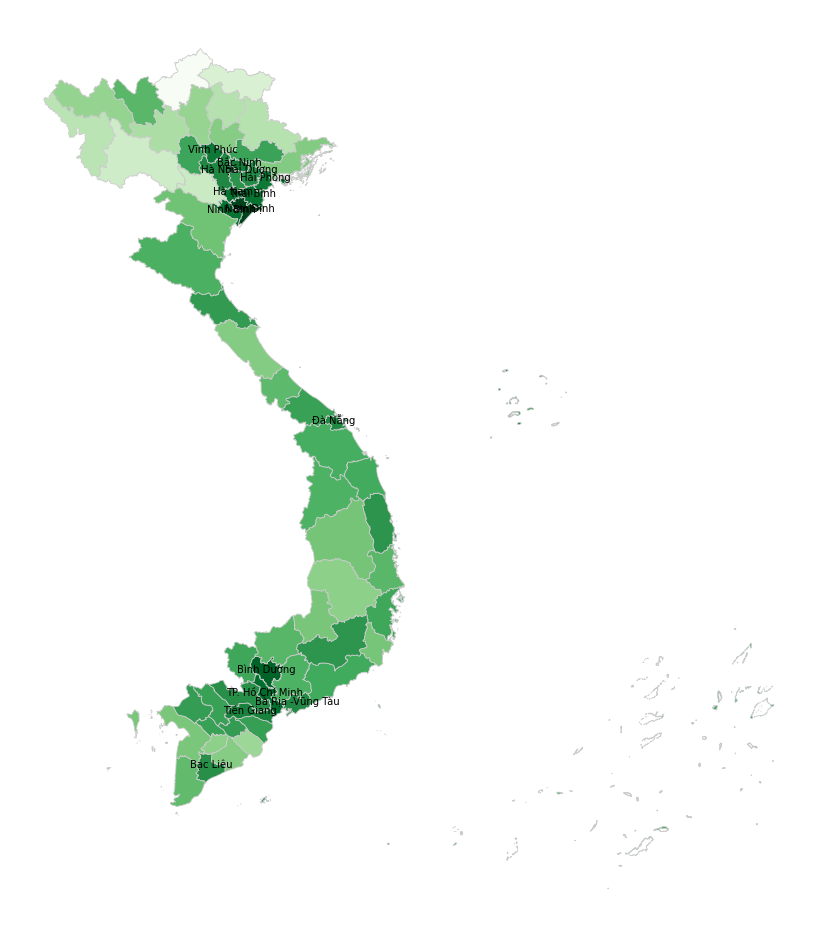

In [66]:
draw_map('Toan_avg')

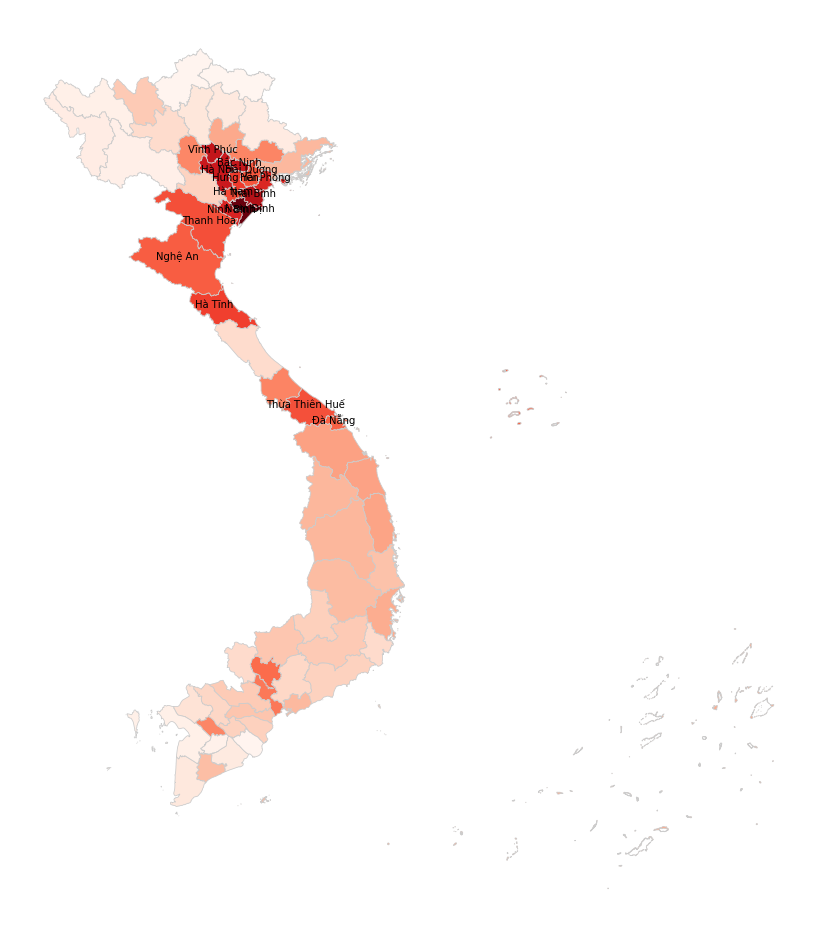

In [67]:
draw_map('Toan_>=9')

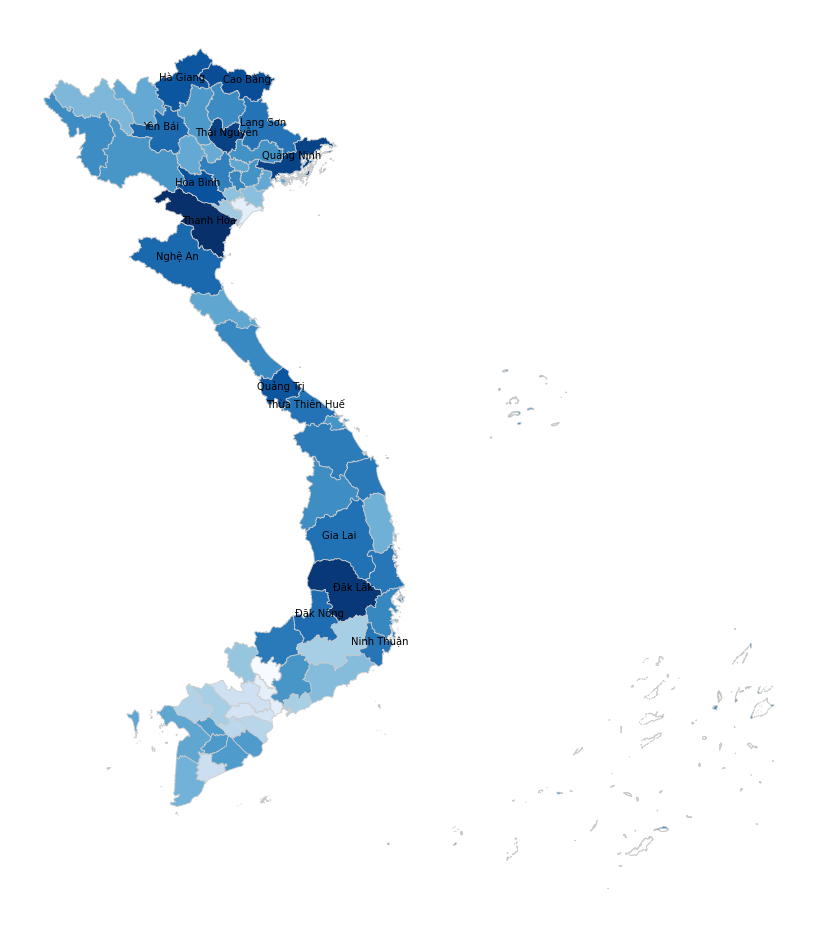

In [68]:
draw_map('Toan_std')

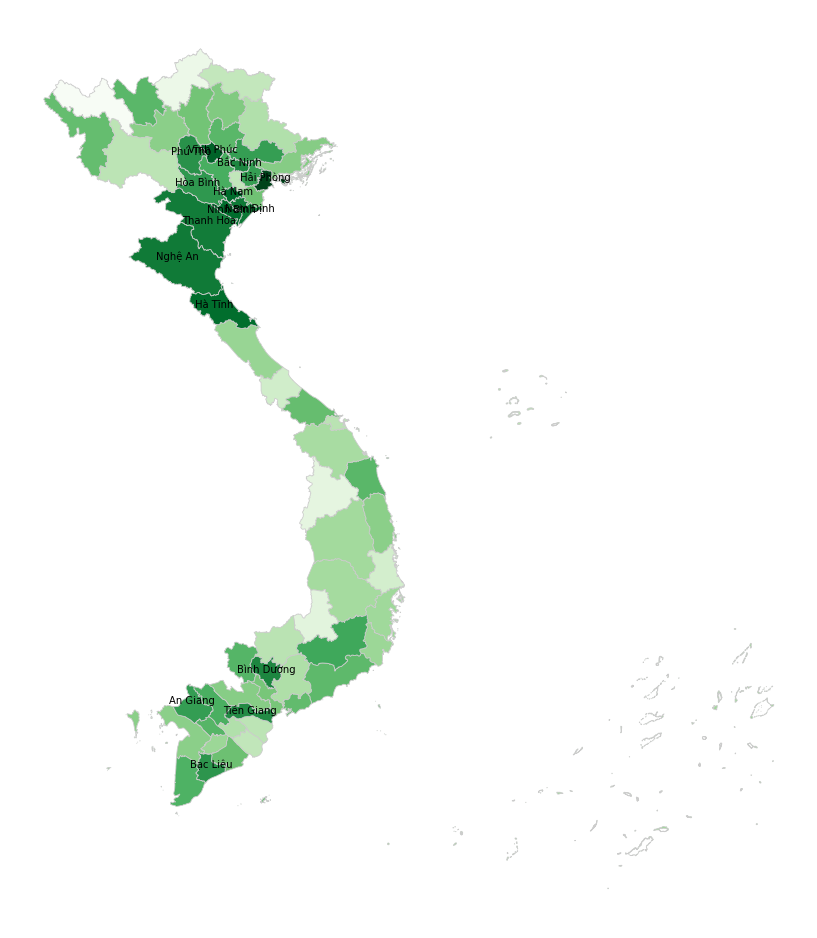

In [69]:
draw_map('Van_avg')

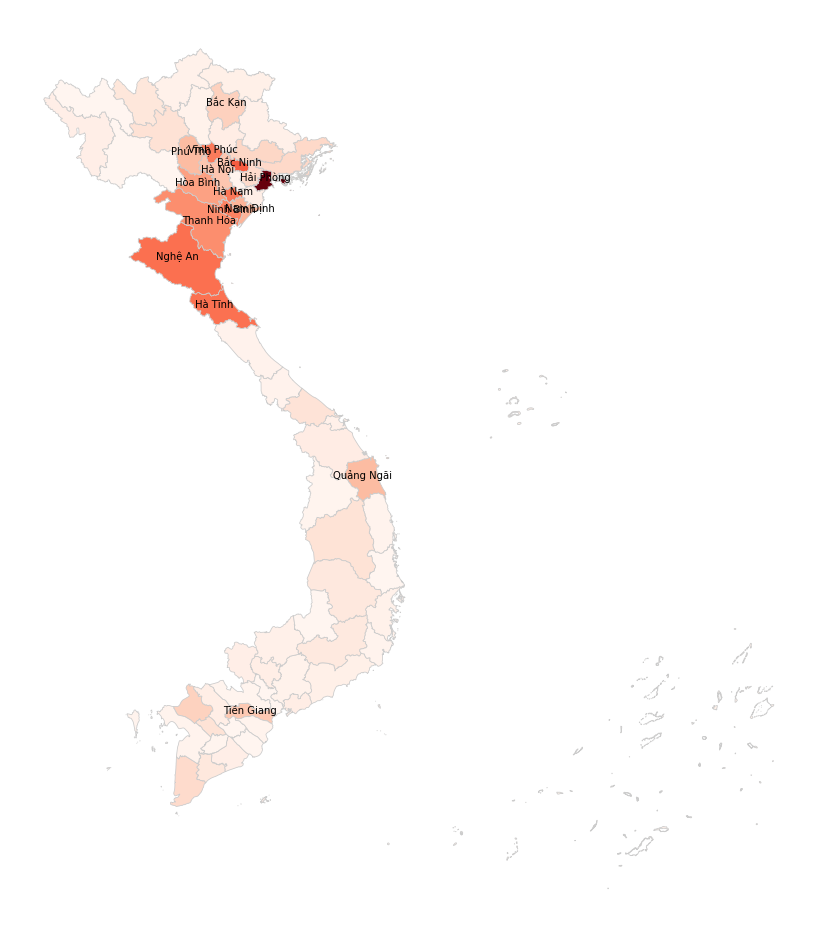

In [70]:
draw_map('Van_>=9')

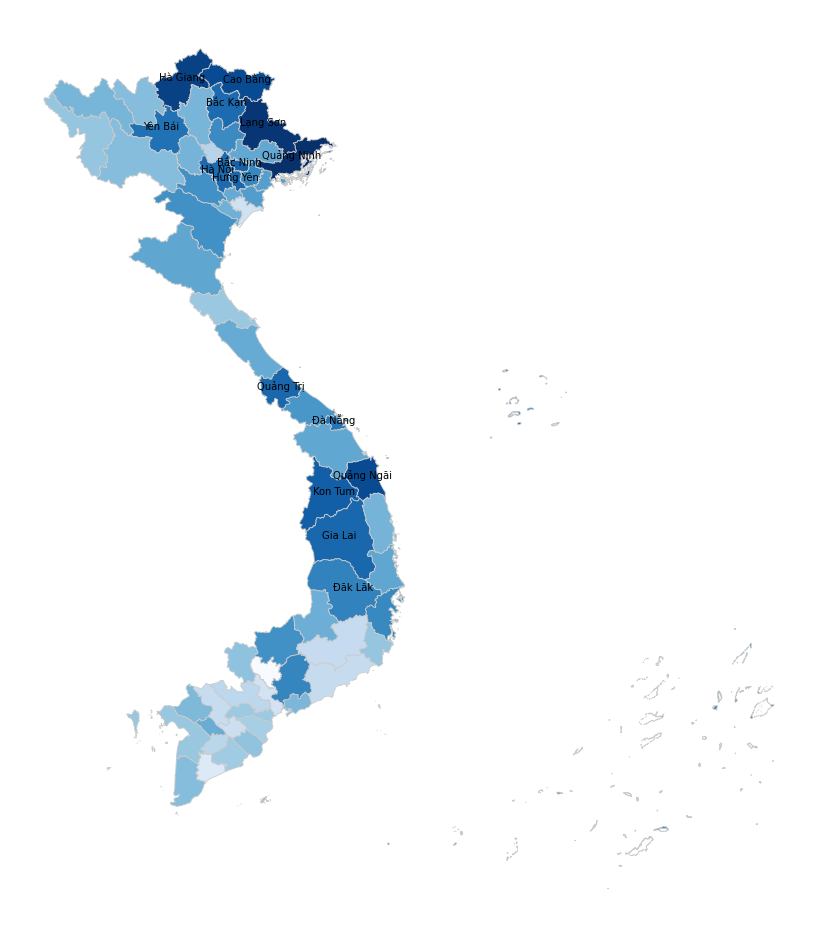

In [71]:
draw_map('Van_std')

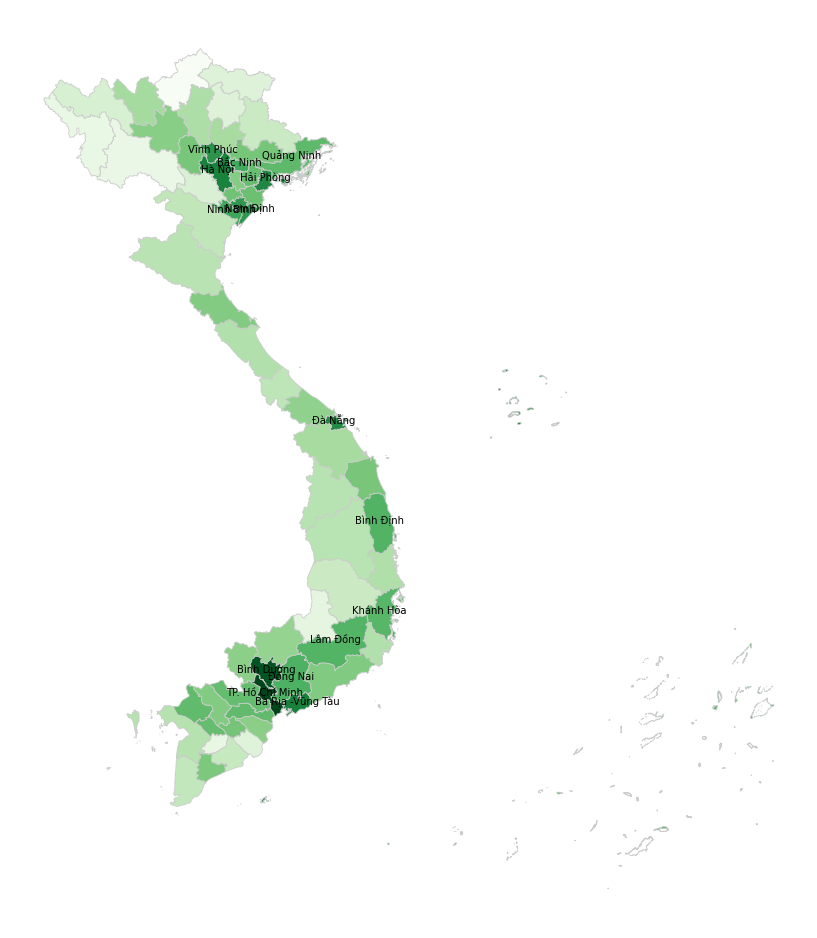

In [72]:
draw_map('Ngoai_ngu_avg')

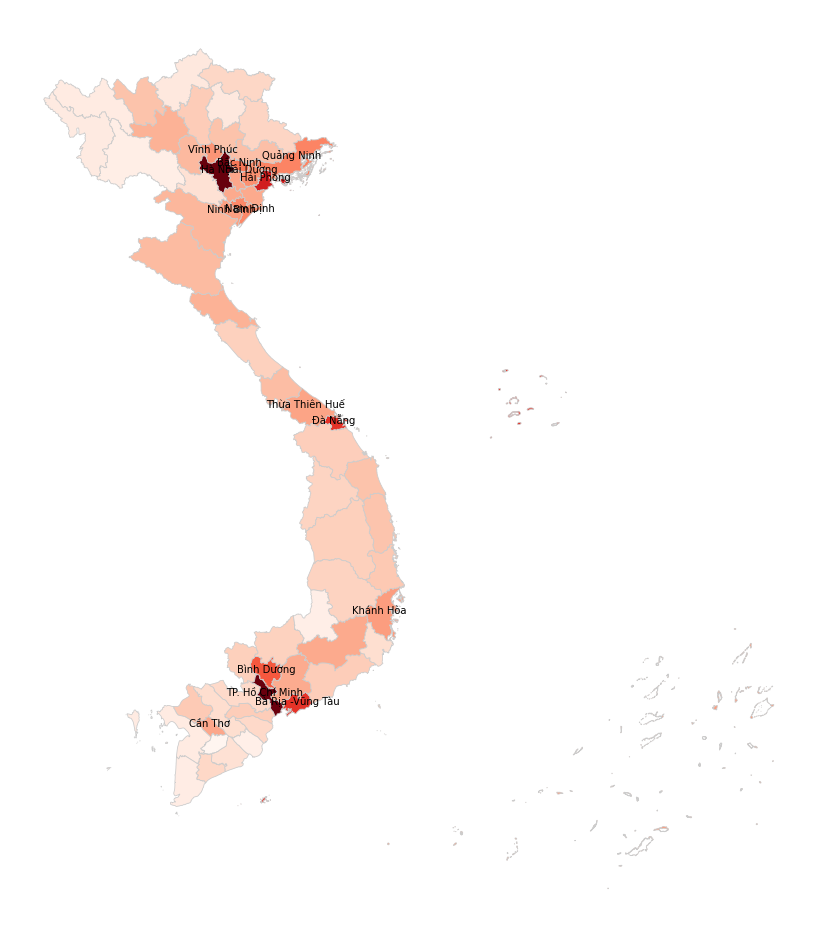

In [73]:
draw_map('Ngoai_ngu_>=9')

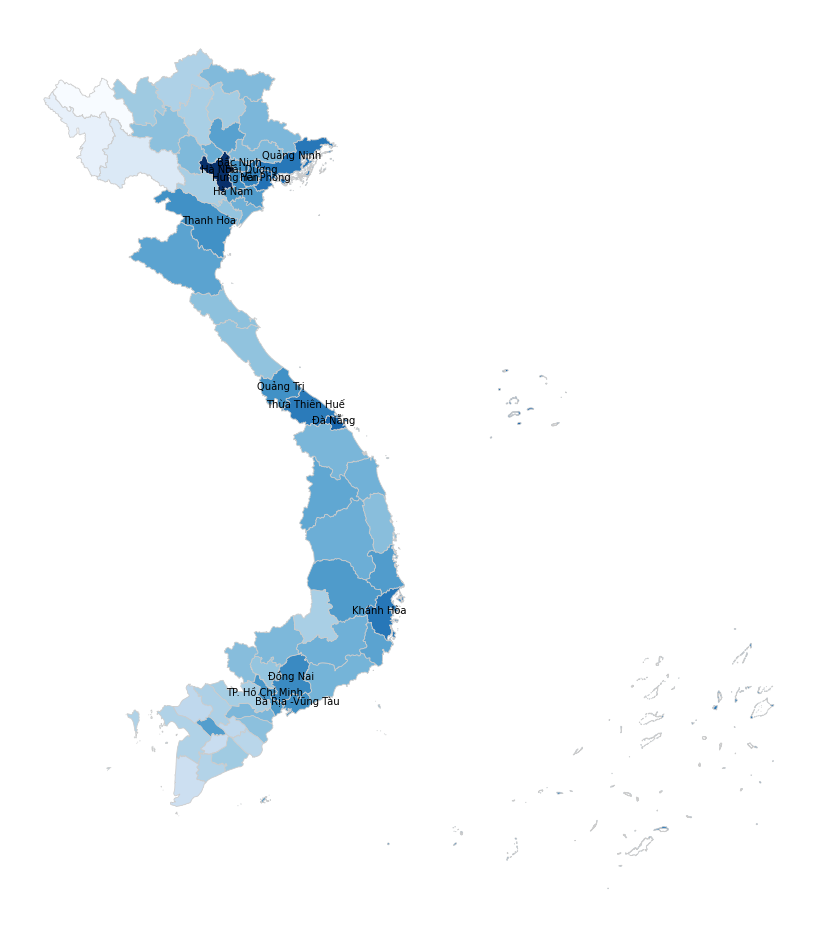

In [74]:
draw_map('Ngoai_ngu_std')

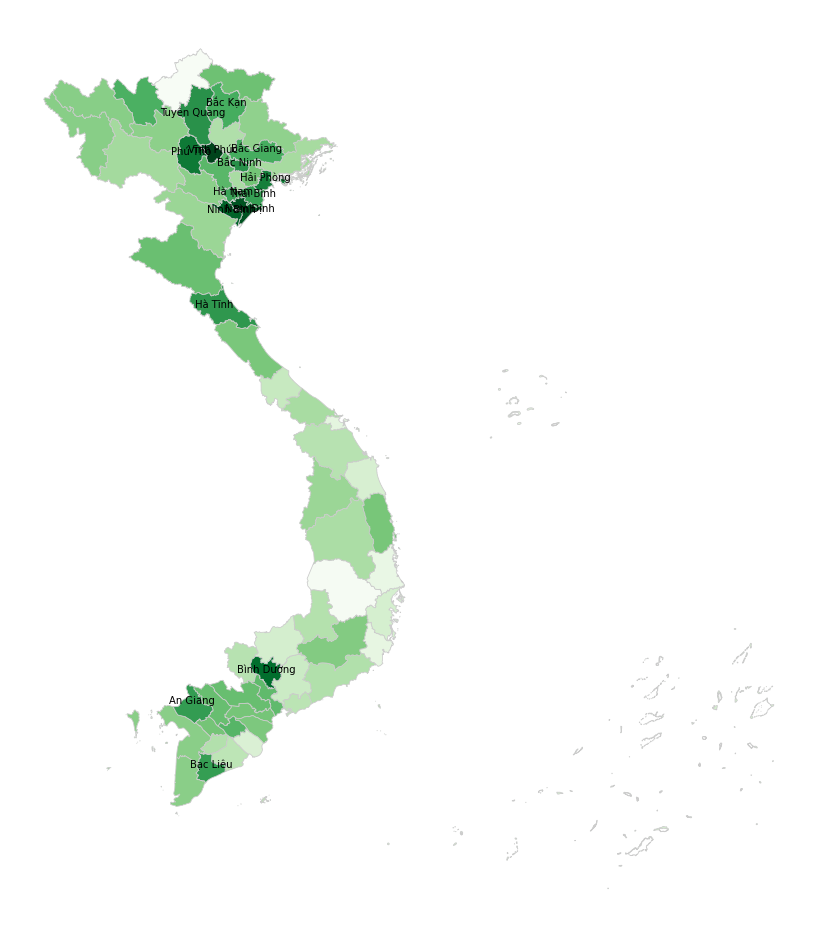

In [75]:
draw_map('Lich_su_avg')

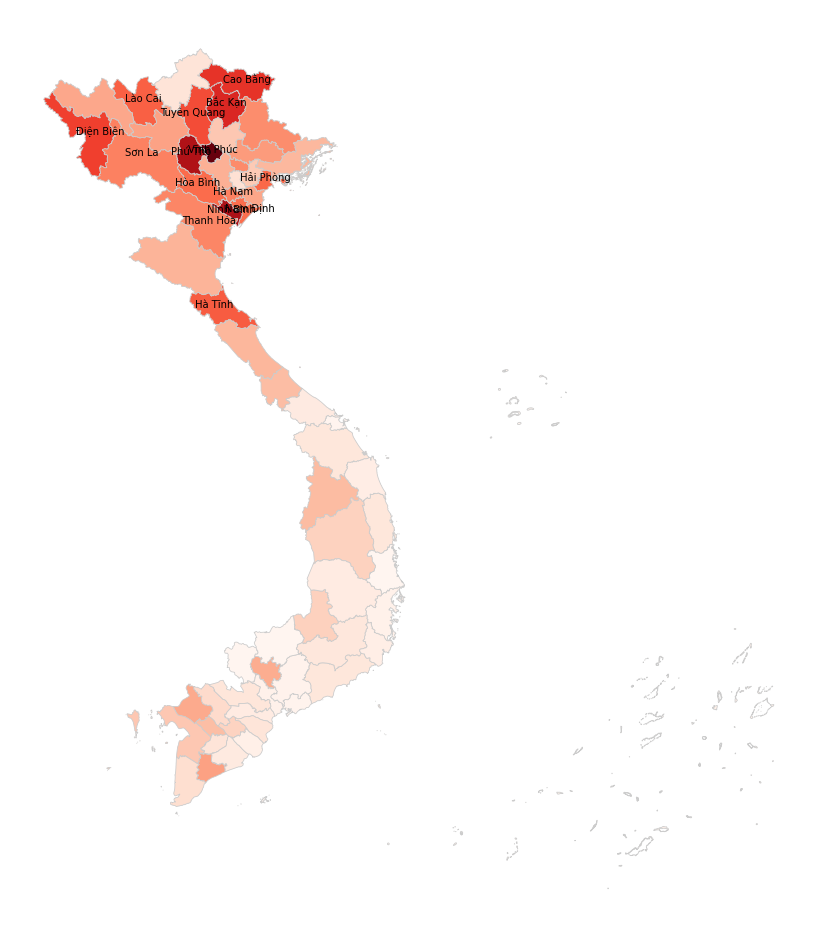

In [76]:
draw_map('Lich_su_>=9')

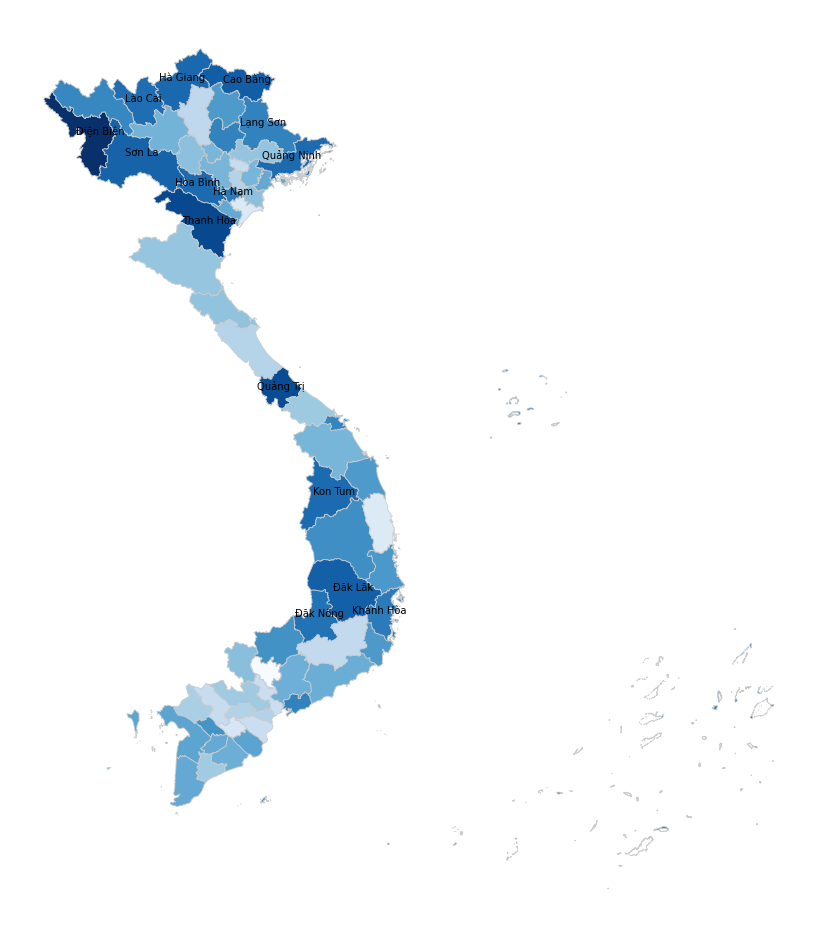

In [77]:
draw_map('Lich_su_std')

# Correlation with GRDP and PCI

In [78]:
PCI = pd.read_excel('./chi_so_cac_tinh.xlsx', sheet_name='PCI')

In [79]:
PCI.head()

,Tỉnh,Gia nhập thị trường,Tiếp cận đất đai,Tính minh bạch,Chi phí thời gian,Chi phí không chính thức,Cạnh tranh bình đẳng,Tính năng động,Chính sách hỗ trợ doanh nghiệp,Đào tạo lao động,Thiết chế pháp lý,Điểm số PCI,Bảng xếp hạng,Xếp loại PCI
0,An Giang,6.44,6.40,6.48,7.06,7.30,4.82,7.18,7.35,5.81,7.87,66.48,17,Khá
1,Bắc Giang,6.76,7.09,6.27,6.99,7.74,5.98,5.66,6.04,6.33,6.99,64.74,31,Khá
2,Bắc Kạn,5.17,7.83,6.25,7.61,7.14,6.67,6.94,5.62,5.34,7.17,62.26,48,Trung bình
3,Bạc Liêu,7.19,7.32,5.74,6.68,6.58,5.99,6.35,6.20,5.37,6.58,61.25,55,Tương đối thấp
4,Bắc Ninh,6.53,7.14,6.39,8.47,7.27,6.29,7.27,7.27,6.74,7.06,69.45,7,Tốt


In [80]:
# Merge map_df with PCI information
map_df = map_df.merge(PCI, how='left', left_on='ten_tinh', right_on='Tỉnh')

In [81]:
map_df.head()

,gid,code,ten_tinh,geometry,Toan_avg,Toan_std,Toan_>=9,Van_avg,Van_std,Van_>=9,...,Chi phí thời gian,Chi phí không chính thức,Cạnh tranh bình đẳng,Tính năng động,Chính sách hỗ trợ doanh nghiệp,Đào tạo lao động,Thiết chế pháp lý,Điểm số PCI,Bảng xếp hạng,Xếp loại PCI
0,18,AD01,Điện Biên,"MULTIPOLYGON (((102.35845 22.48274, 102.35965 ...",5.481237,1.666153,0.006237,6.466841,1.181523,0.006705,...,6.07,6.07,6.09,6.71,6.59,5.38,7.32,61.86,53,Trung bình
1,55,AD01,Thanh Hóa,"MULTIPOLYGON (((105.82264 19.30695, 105.82084 ...",6.080123,1.939507,0.029413,7.181820,1.332836,0.058747,...,7.49,6.30,5.70,6.75,6.98,5.01,7.45,63.21,43,Trung bình
2,49,AD01,Quảng Trị,"MULTIPOLYGON (((107.07453 17.10850, 107.08320 ...",6.200118,1.828339,0.022562,5.602258,1.437801,0.003124,...,6.87,6.89,4.95,6.82,5.81,5.39,6.99,63.33,41,Trung bình
3,14,AD01,Cao Bằng,"MULTIPOLYGON (((105.56411 23.11317, 105.56613 ...",5.173134,1.854450,0.003966,5.735428,1.509940,0.005156,...,5.31,5.18,5.53,6.32,5.46,5.16,6.68,56.29,63,Thấp
4,16,AD01,Đăk Lăk,"MULTIPOLYGON (((108.06956 13.40431, 108.07056 ...",5.862827,1.913889,0.014989,5.999775,1.372882,0.011647,...,7.00,6.69,7.17,6.59,6.81,5.97,7.73,64.20,34,Trung bình


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text major ticklabel objects>)

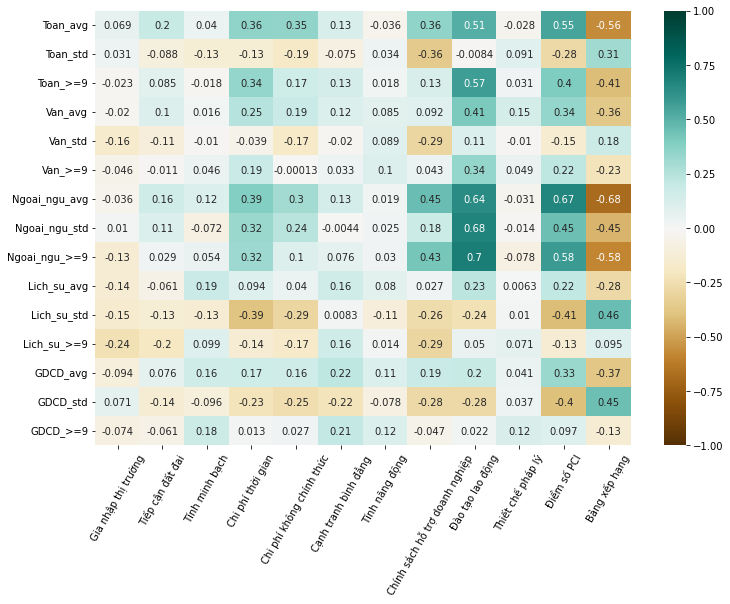

In [82]:
PCI_cols = ['Gia nhập thị trường',
       'Tiếp cận đất đai', 'Tính minh bạch', 'Chi phí thời gian',
       'Chi phí không chính thức', 'Cạnh tranh bình đẳng', 'Tính năng động',
       'Chính sách hỗ trợ doanh nghiệp', 'Đào tạo lao động',
       'Thiết chế pháp lý', 'Điểm số PCI', 'Bảng xếp hạng']

subject_cols = ['Toan_avg', 'Toan_std', 'Toan_>=9', 'Van_avg', 'Van_std', 'Van_>=9',
       'Ngoai_ngu_avg', 'Ngoai_ngu_std', 'Ngoai_ngu_>=9', 'Lich_su_avg',
       'Lich_su_std', 'Lich_su_>=9', 'GDCD_avg', 'GDCD_std', 'GDCD_>=9']

plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(map_df[PCI_cols + subject_cols].corr()[PCI_cols]).iloc[len(PCI_cols):], vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.xticks(rotation=60)